In [366]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
from scipy.io import loadmat
import random 

In [367]:
# ---------------------------------load the data--------------------------------------
ocr = loadmat('ocr.mat')
n_list = [1000, 2000, 4000, 8000]

test_data = ocr['testdata'].astype('float')
test_labels = ocr['testlabels'].astype('float')

In [368]:
# ---------build function for predicting, calculating error rate, and repeating---------
def prediction(traindata, trainlabel, testdata):
    '''

    :param traindata: np.array, the feature data of train vector
    :param trainlabel: np.array, the label data of train vector
    :param testdata: np.array, the feature data of test vector
    :return: np.array, a prediction array for each test vector
    '''

    def find_index(train, test):
        # calculate the norm of each train vector
        test_2 = np.linalg.norm(test, axis=1) ** 2
        test_2.resize(len(test_2), 1)
        # calculate the norm of each test vector
        train_2 = np.linalg.norm(train, axis=1) ** 2
        train_2.resize(len(train_2), 1)
        # calculate x_i^Tt_j
        train_test = np.dot(train, test.T)
        # (i,j) in distance_matrix is the distance between x_i and t_j
        distance_matrix = train_2 - 2 * train_test + test_2.T
        # find the smallest value's index of each column
        index = np.argmin(distance_matrix, axis=0)
        return index

    pred = trainlabel[find_index(traindata, testdata)]
    return pred


In [369]:
def exam(sample_size, test=None, testlabel=None):
    '''

    :param sample_size: int, the value of n(sample size of the traindata)
    :param test: np.array, the feature data of test vector.
           Notice: If there is no test input, it will be set to train
    :param testlabel: np.array, the labels data of test vector
           Notice: If there is no testlabel input, it will be set to trainlabel
    :return: float, the error rate of prediction func on testlabel
    '''
    # load data
    sel = random.sample(range(60000), sample_size)
    train = ocr['data'][sel].astype('float')
    train_label = ocr['labels'][sel]
    # when there is no test data, use train data as test data
    if test is None:
        test = train
    if testlabel is None:
        testlabel = train_label

    # predict on test data
    pred = prediction(train, train_label, test)

    # calculate error rate on test data
    t = [1 for i in range(len(pred)) if not pred[i] == testlabel[i]]

    error_rate = sum(t) / len(testlabel)

    return error_rate

In [370]:
def repeat(samplesize, testdata=None, testlabel=None, times=10):
    '''

    :param times: int, repeat times of the model(exam func)
    :param samplesize: int, the value of n(sample size of the traindata)
    :param testdata:  np.array, the feature data of test vector.
           Notice: If there is no testdata input, it will be set to traindata
    :param testlabel: np.array, the labels data of test vector
           Notice: If there is no testlabel input, it will be set to trainlabel
    :return: np.array,  test error rate of each prediction
    '''
    # ger the error rate list of each prediction
    if times <= 0:
        return 'time should be positive int'
    err = np.array([])
    for i in range(times):
        err = np.append(err, exam(samplesize, testdata, testlabel))

    return err

In [371]:
# ----------------------------start to run our model----------------------------------
# get the result of each prediction, stored as dict
train_result = {n: repeat(n) for n in n_list}
test_result = {n: repeat(n, test_data, test_labels) for n in n_list}

# calculate the average mean of each n's error rate
train_n_mean = [np.mean(train_result[n]) for n in n_list]
test_n_mean = [np.mean(test_result[n]) for n in n_list]

# calculate the standard deviation of each n's error rate
train_n_std = [np.std(train_result[n]) for n in n_list]
test_n_std = [np.std(test_result[n]) for n in n_list]


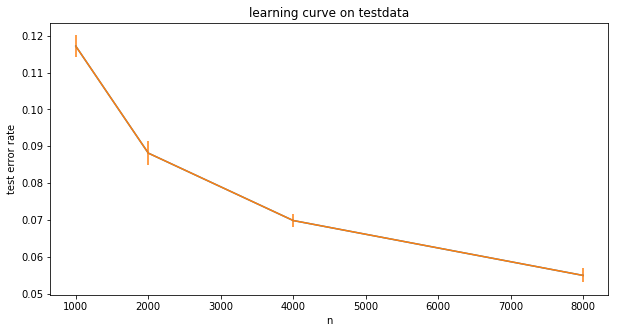

In [372]:
# --------------------------start to plot learning curve------------------------------
# plot for test data
fig_test = plt.figure(figsize=(10, 5))
ax_test = fig_test.add_subplot(111)
ax_test.plot(n_list, test_n_mean)
ax_test.errorbar(n_list, test_n_mean, yerr=test_n_std)
ax_test.set_xlabel('n')
ax_test.set_ylabel('test error rate')
ax_test.set_title('learning curve on testdata')
# fig_test.savefig('learning_curve_test.png')
plt.show()

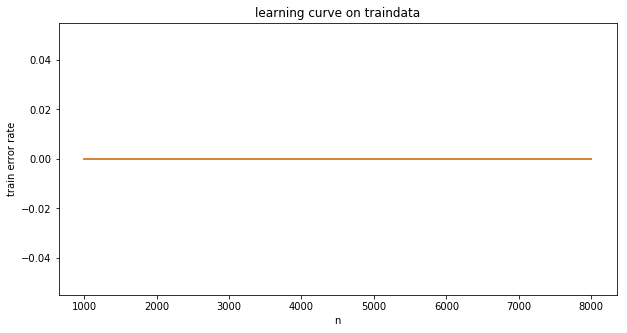

In [374]:
# plot for train data
fig_train = plt.figure(figsize=(10, 5))
ax_train = fig_train.add_subplot(111)
ax_train.plot(n_list, train_n_mean)
ax_train.errorbar(n_list, train_n_mean, yerr=train_n_std)
ax_train.set_xlabel('n')
ax_train.set_ylabel('train error rate')
ax_train.set_title('learning curve on traindata')
# fig_train.savefig('learning_curve_train.png')
plt.show()

In [375]:
train_result

{1000: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2000: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 4000: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 8000: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

In [376]:
test_result

{1000: array([ 0.1202,  0.1182,  0.1188,  0.1154,  0.1146,  0.1176,  0.1226,
         0.116 ,  0.1165,  0.1115]),
 2000: array([ 0.0841,  0.088 ,  0.0878,  0.088 ,  0.0855,  0.0888,  0.0921,
         0.0827,  0.0925,  0.0919]),
 4000: array([ 0.07  ,  0.0694,  0.0699,  0.0668,  0.0708,  0.0738,  0.0683,
         0.0716,  0.0684,  0.0695]),
 8000: array([ 0.0537,  0.0565,  0.0551,  0.0551,  0.0521,  0.0536,  0.0569,
         0.0527,  0.0553,  0.0586])}

In [378]:
train_n_mean

[0.0, 0.0, 0.0, 0.0]

In [379]:
test_n_mean

[0.11713999999999999,
 0.08814000000000001,
 0.069849999999999995,
 0.054959999999999995]

In [380]:
train_n_std

[0.0, 0.0, 0.0, 0.0]

In [382]:
test_n_std

[0.0029370733732748317,
 0.0031984996482726088,
 0.0018364367672206966,
 0.0019043108989868229]